# Problem 12.8

**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 12**

**Problem 12.8**


**For the spectra in Problem S12.7 and assuming that the lamps are located at the correct position, what is the error that is made at each of the nine 100 nm broadbands from 300 to 1200 nm for each of the lamps with respect to the solar spectrum?**

We will use the package [pandas](https://pandas.pydata.org/) to handle the data and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

We start by importing the data for the solar spectra.

In [2]:
reference = pd.read_csv('data/Reference_spectrum_ASTM-G173-03.csv', index_col=0, header=0) 
reference

,AM0,AM1.5G,AM1.5D
Wvlgth nm,Etr W*m-2*nm-1,Global tilt W*m-2*nm-1,Direct+circumsolar W*m-2*nm-1
280,8.20E-02,4.73E-23,2.54E-26
280.5,9.90E-02,1.23E-21,1.09E-24
281,1.50E-01,5.69E-21,6.13E-24
281.5,2.12E-01,1.57E-19,2.75E-22
...,...,...,...
3980,8.84E-03,7.39E-03,7.40E-03
3985,8.80E-03,7.43E-03,7.45E-03
3990,8.78E-03,7.37E-03,7.39E-03
3995,8.70E-03,7.21E-03,7.23E-03


In [3]:
reference.drop(reference.index[0], inplace=True)   # remove row including information on units
reference=reference.astype(float)                  # convert values to float for easy operation
reference.index=reference.index.astype(float)      # convert indexes to float for easy operation

We import the data for the Xe-arc lamp.

In [4]:
xe_arc = pd.read_csv('data/Xe lamp spectral irradiance.csv', index_col=0, header=0) 
xe_arc

,Xe arc lamp (W*m-2*nm-1)
wavelength (nm),
300.36966,0.000793
300.58005,0.000816
300.79044,0.000837
301.00082,0.000858
301.21124,0.000876
...,...
1199.77246,0.213920
1199.84302,0.213600
1199.91345,0.213280


We import the data for the quartz tungsten lamp.

In [5]:
quartz_w = pd.read_csv('data/W lamp spectral irradiance.csv', index_col=0, header=0) 
quartz_w

,W halogen lamp (W*m-2*nm-1)
wavelength (nm),
300,0.000001
301,0.000010
302,0.000100
303,0.000200
304,0.000300
...,...
1196,0.654304
1197,0.653941
1198,0.651544


We can also plot the AM1.5G spectra, the Xe-arc lamp, and the quarz tungsten lamp spectra.

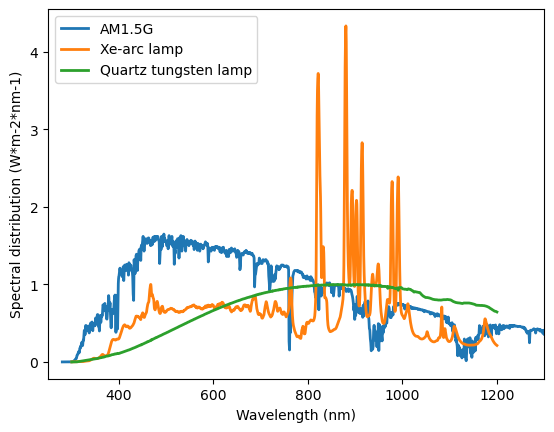

In [6]:
plt.plot(reference['AM1.5G'], 
         linewidth=2, label='AM1.5G')
plt.plot(xe_arc, 
         linewidth=2, label='Xe-arc lamp')
plt.plot(quartz_w, 
         linewidth=2, label='Quartz tungsten lamp')
plt.ylabel('Spectral distribution (W*m-2*nm-1)')
plt.xlabel('Wavelength (nm)')
plt.xlim([250,1300])
plt.legend()

We can calculate the total irradiance from every spectra in each 100 nm-bands from 300 to 1200 nm. 

In [7]:
bands = np.array(np.arange(300,1300,100))
w=5
irradiance_bands = pd.DataFrame(columns=['AM1.5G', 'Xe arc lamp', 'Quartz W halogen lamp'])
AM15G=reference['AM1.5G']
Xe=xe_arc['Xe arc lamp (W*m-2*nm-1)']
Quartz_W=quartz_w['W halogen lamp (W*m-2*nm-1)']
for band in bands:    
    AM15G_interpolated=np.interp(np.arange(band, band+100, w), AM15G.index, AM15G.values)   
    irradiance_bands.loc[band,'AM1.5G'] = AM15G_interpolated.sum()*w
    
    Xe_interpolated=np.interp(np.arange(band, band+100, w), Xe.index, Xe.values)   
    irradiance_bands.loc[band,'Xe arc lamp'] = Xe_interpolated.sum()*w
    
    Quartz_W_interpolated=np.interp(np.arange(band, band+100, w), Quartz_W.index, Quartz_W.values)   
    irradiance_bands.loc[band,'Quartz W halogen lamp'] = Quartz_W_interpolated.sum()*w
irradiance_bands

,AM1.5G,Xe arc lamp,Quartz W halogen lamp
300,46.3471,7.745697,4.3254
400,137.925,59.513764,22.750901
500,151.4,68.860502,51.50123
600,140.4,71.229846,77.502158
700,111.44,58.938656,93.554867
800,95.685,118.622972,99.165299
900,56.28,112.40382,97.922396
1000,64.92,38.525673,85.919091
1100,31.3655,30.108108,74.070708
1200,43.635,21.265237,64.467675


We can plot the total irradiance per band from the different lamps. 

Text(0.5, 0, 'Wavelength (nm)')

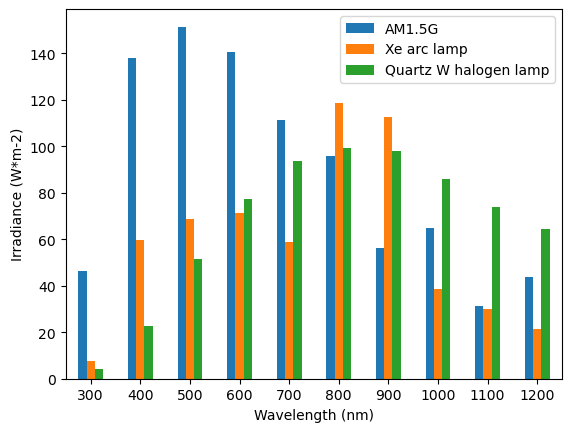

In [8]:
ax = irradiance_bands.plot.bar(rot=0)
plt.ylabel('Irradiance (W*m-2)')
plt.xlabel('Wavelength (nm)')

We can also calculate the errors in percentage. 

In [9]:
irradiance_bands['error Xe arc lamp'] = 100*(irradiance_bands['Xe arc lamp']/irradiance_bands['AM1.5G']-1)
irradiance_bands['error Quartz W halogen lamp'] = 100*(irradiance_bands['Quartz W halogen lamp']/irradiance_bands['AM1.5G']-1)

irradiance_bands

,AM1.5G,Xe arc lamp,Quartz W halogen lamp,error Xe arc lamp,error Quartz W halogen lamp
300,46.3471,7.745697,4.3254,-83.287635,-90.667377
400,137.925,59.513764,22.750901,-56.850633,-83.504875
500,151.4,68.860502,51.50123,-54.517502,-65.983335
600,140.4,71.229846,77.502158,-49.266492,-44.799033
700,111.44,58.938656,93.554867,-47.111759,-16.049114
800,95.685,118.622972,99.165299,23.97238,3.637246
900,56.28,112.40382,97.922396,99.722494,73.991465
1000,64.92,38.525673,85.919091,-40.656696,32.346104
1100,31.3655,30.108108,74.070708,-4.008838,136.153444
1200,43.635,21.265237,64.467675,-51.265643,47.743038
